In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder 

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data"


cols = ["Class" ,
 "age",
 "menopause",
"tumor-size",
 "inv-nodes",
 "node-caps",
 "deg-malig", 
 "breast" , 
 "breast-quad",
"irradiat",
 ]
df = pd.read_csv(path ,names=cols, header=None)
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [3]:
def missing_values(df):
    missing_val = df.isnull().sum()
    missing_perc = missing_val*100/ df.isnull().count()

    missing_df = pd.DataFrame(missing_val,columns=['Number of missing values'])
    missing_df['Percentage'] = missing_perc
    return missing_df

missing_values(df)

,Number of missing values,Percentage
Class,0,0.0
age,0,0.0
menopause,0,0.0
tumor-size,0,0.0
inv-nodes,0,0.0
node-caps,0,0.0
deg-malig,0,0.0
breast,0,0.0
breast-quad,0,0.0
irradiat,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [5]:
df.nunique()

Class           2
age             6
menopause       3
tumor-size     11
inv-nodes       7
node-caps       3
deg-malig       3
breast          2
breast-quad     6
irradiat        2
dtype: int64

### EDA ###

In [6]:
rcparams_dict = {'lines.linewidth': 2, 'lines.linestyle': '-','grid.color':'r','grid.linestyle':'--',
                 'grid.alpha':0.6,'grid.linewidth':0.8,'axes.titlesize':'xx-large'} 
                    # set plots parameters

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

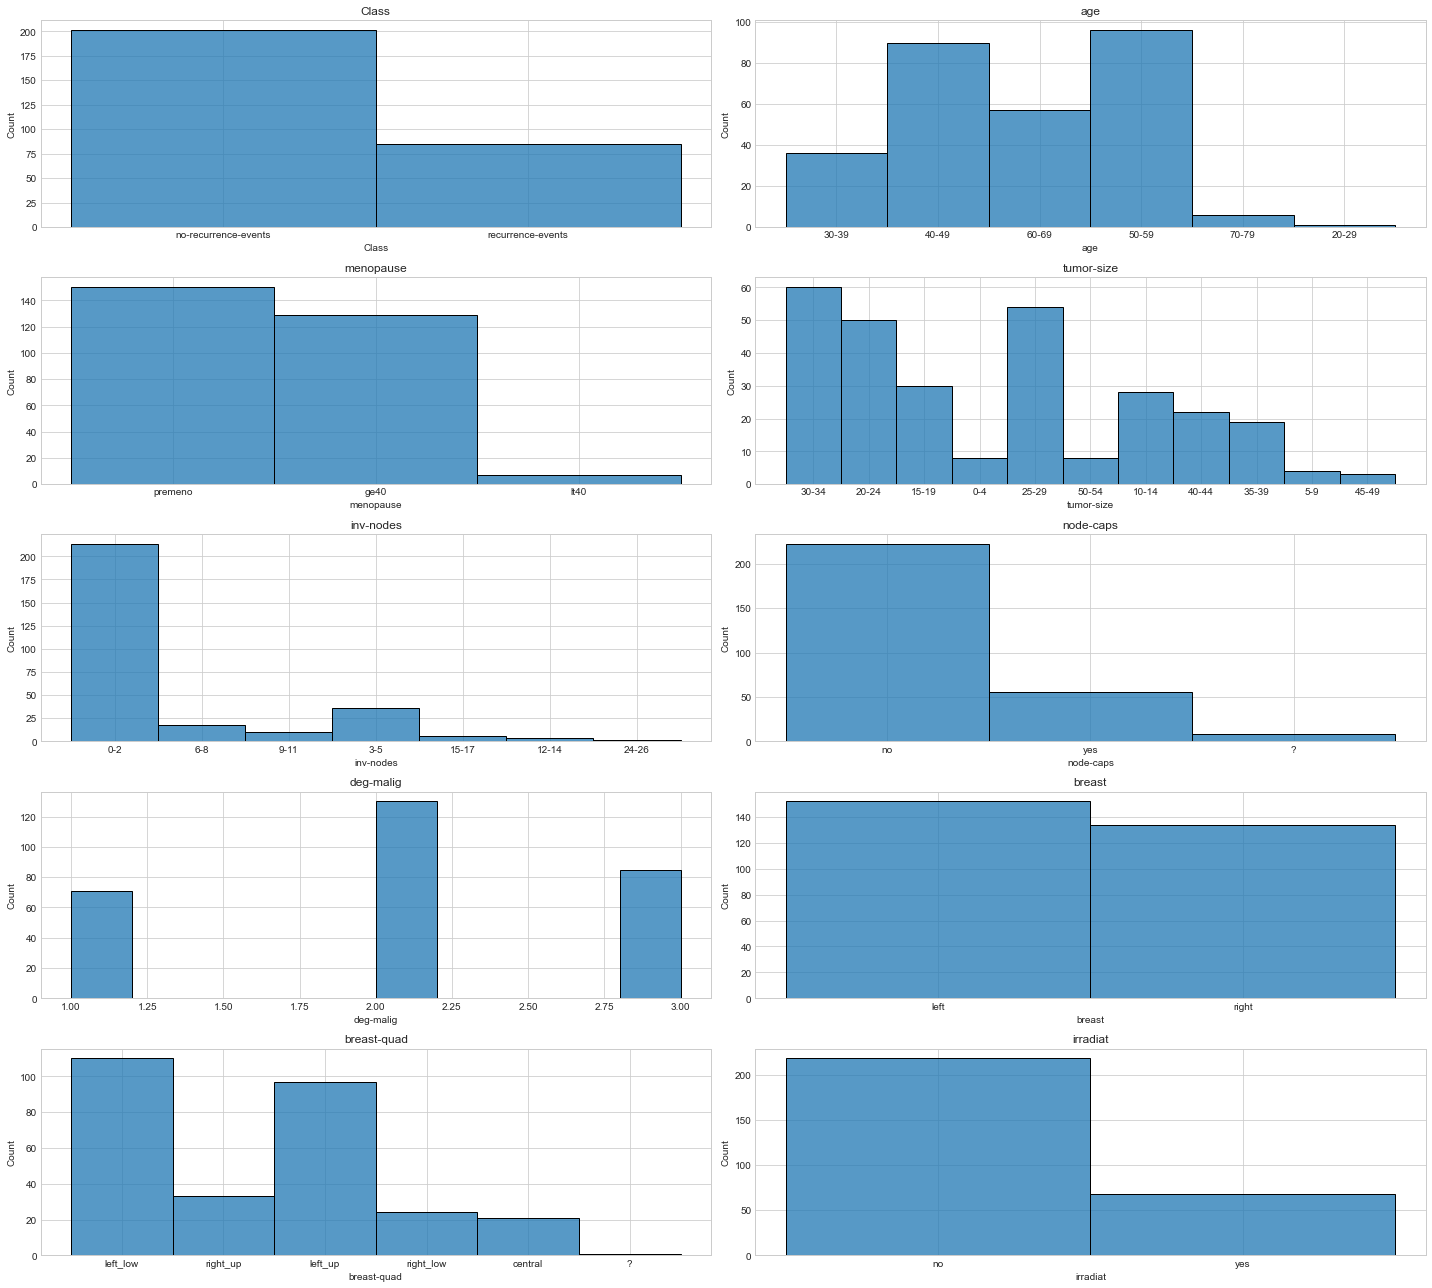

In [8]:
plt.style.use("seaborn-whitegrid")
col_list = df.columns

fig, axs = plt.subplots(5, 2,figsize=(20,18))

c=0



for i in  range(5):
    for j in range(2):
        if j==2 and i==4:
            break
        sns.histplot(data = df , x=col_list[c],ax= axs[i, j])
        axs[i, j].set_title(col_list[c])
        fig.tight_layout()
        c+=1
        
 

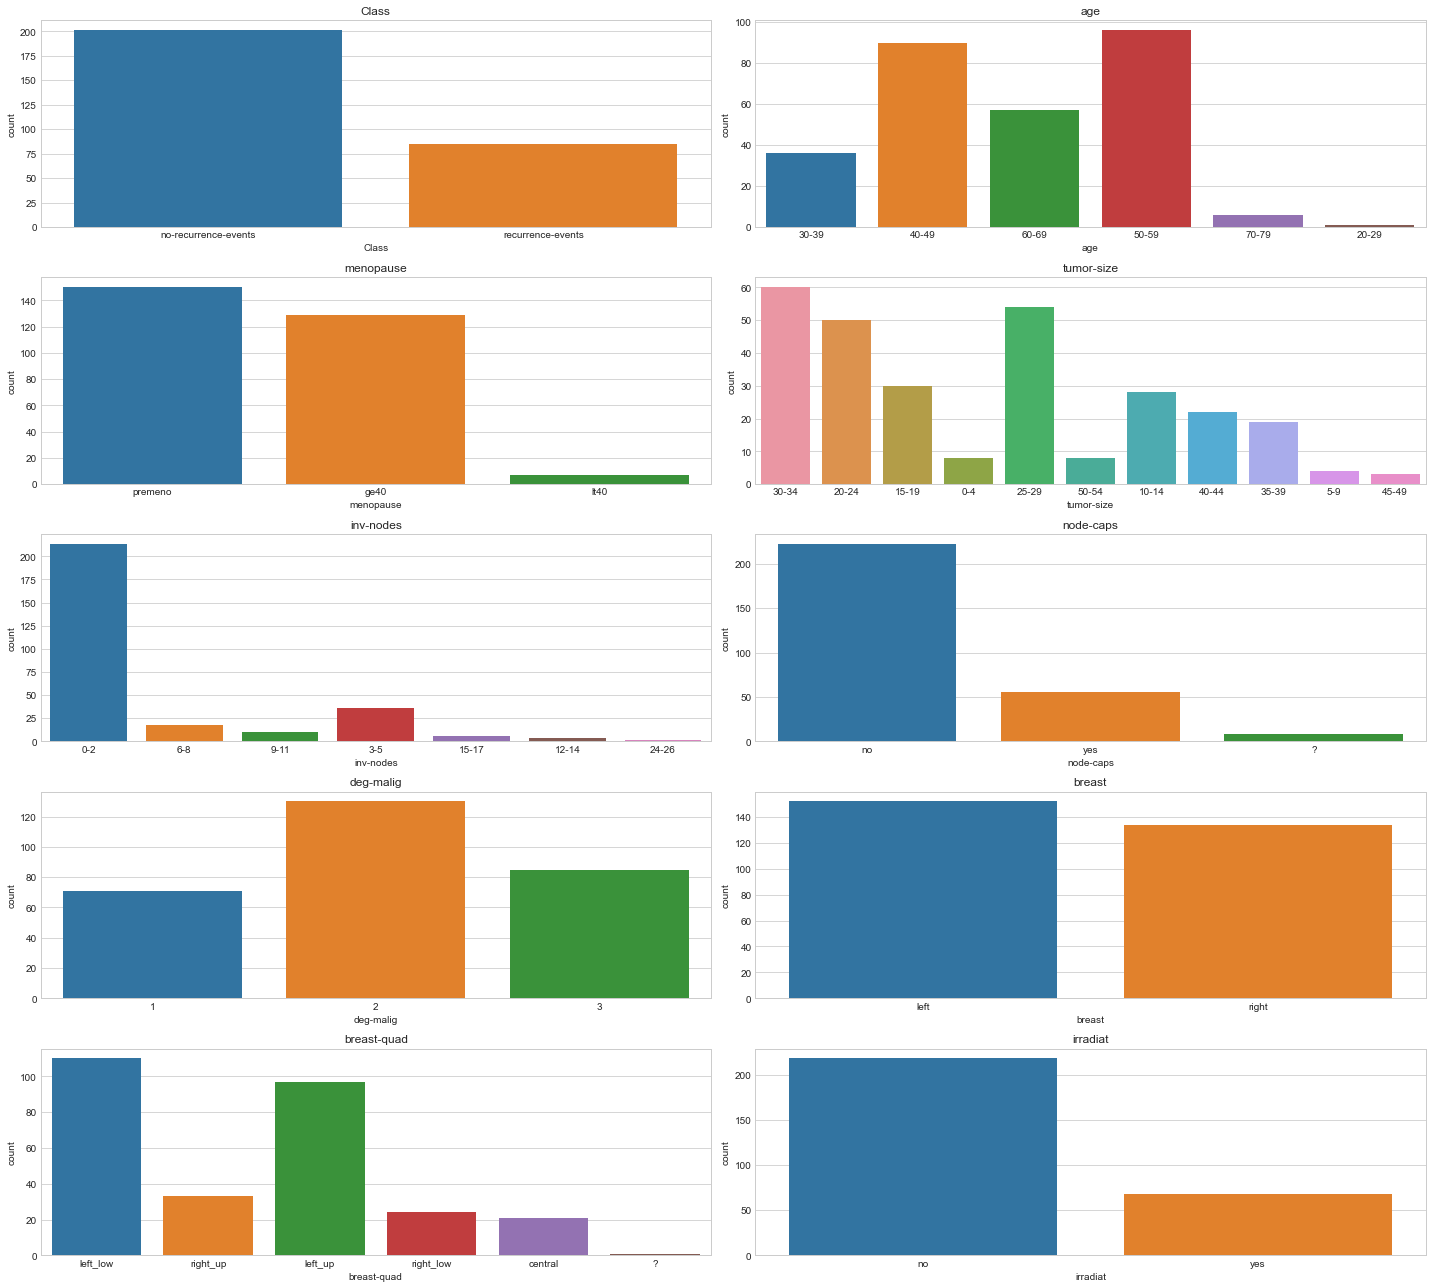

In [9]:
fig, axs = plt.subplots(5, 2,figsize=(20,18))

c=0
for i in  range(5):
    for j in range(2):
        if j==2 and i==4:
            break
        sns.countplot(data=df , x=col_list[c],ax=axs[i,j])
        axs[i, j].set_title(col_list[c])
        fig.tight_layout()
        c+=1


In [10]:
# Here we have only one numerical variable. Others are categorical variables.

In [11]:
df = df.drop(columns= ['tumor-size'],axis=0) 
'''drop this because of having 11 categories. 11 is not a large number to encode
But compare to other indipendent variables better to eliminate this feature'''

'drop this because of having 11 categories. 11 is not a large number to encode\nBut compare to other indipendent variables better to eliminate this feature'

In [12]:
# Feature encoding
# nominal_features encoding with one hot encoding 
nom_features = ["Class","menopause","node-caps","breast","breast-quad"]

In [13]:
#nominal feature encoding with one hotencoding
ohe_df = pd.get_dummies(df[nom_features])
main = df.drop(columns=nom_features,axis=0)
main = main.join(ohe_df)
main.head(10)

,age,inv-nodes,deg-malig,irradiat,Class_no-recurrence-events,Class_recurrence-events,menopause_ge40,menopause_lt40,menopause_premeno,node-caps_?,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,30-39,0-2,3,no,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1,40-49,0-2,2,no,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,40-49,0-2,2,no,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
3,60-69,0-2,2,no,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,40-49,0-2,2,no,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
5,60-69,0-2,2,no,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
6,50-59,0-2,2,no,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
7,60-69,0-2,1,no,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
8,40-49,0-2,2,no,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
9,40-49,0-2,2,no,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [14]:
#Ordinal feature encoding
#grouped data are encoded using LabelEncoding()
ord_features = ["age","inv-nodes"]

In [15]:
val = df["age"].unique()
order_age = sorted(val)
label_age = list(range(len(order_age)))
label_age
encoding_age = dict(zip(order_age,label_age))
encoding_age

{'20-29': 0, '30-39': 1, '40-49': 2, '50-59': 3, '60-69': 4, '70-79': 5}

In [16]:
val_2 = df["inv-nodes"].unique()
order_inv_nodes = sorted(val_2)
label_inv_nodes = list(range(len(order_inv_nodes)))
encoding_inv_nodes = dict(zip(order_inv_nodes,label_inv_nodes))
encoding_inv_nodes

{'0-2': 0, '12-14': 1, '15-17': 2, '24-26': 3, '3-5': 4, '6-8': 5, '9-11': 6}

In [17]:
main.age = main.age.map(encoding_age)
main['inv-nodes'] = main['inv-nodes'].map(encoding_inv_nodes)

#encode the target accordingto the labelEncoder()

le = LabelEncoder()
main.irradiat = le.fit_transform(main.irradiat)

In [18]:
main.head(10)

,age,inv-nodes,deg-malig,irradiat,Class_no-recurrence-events,Class_recurrence-events,menopause_ge40,menopause_lt40,menopause_premeno,node-caps_?,node-caps_no,node-caps_yes,breast_left,breast_right,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up
0,1,0,3,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
1,2,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1
2,2,0,2,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
3,4,0,2,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0
4,2,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0
5,4,0,2,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
6,3,0,2,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
7,4,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0
8,2,0,2,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0
9,2,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [19]:
main.to_csv('processed_data.csv',index = False)